<img src="v6p1.png" style="width:120px;height:100px"/>

Todays' Agenda of the Video:-----
- 1. What is Regression Analysis?
- 2. What is Simple Linear Regression, in particular?
- 3. How to create LR using Statsmodels?
- 4. Analyze the summary report of Statsmodel?
- 5. Significance of p-value?
- 6. How to assess the accuracy of a linear model?
- 7. What is R-squared?
- 8. What is the Residual sum of Square (RSS)?
- 9. What is Residual Standard Error (RSE)?
- 10. How to find Residual Standard Error (RSE)?
- 10. How to find Residual Standard Error (RSE)?

# About Linear Regression
- In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')
- In particular, linear regression is a useful tool for predicting a quantitative response.
- Consequently, the importance of having a good understanding of linear regression before studying more complex learning methods cannot be overstated.
- In this chapter, we review some of the key ideas underlying the linear regression model, as well as the least squares approach that is most commonly used to fit this model.

# Business Problem
- As Data Sciencetist we are asked to suggest, on the basis of this data, a marketing plan for next year that will result in high product sales.
- What information would be useful in order to provide such a recommendation? 
- Here are a few important questions that we might seek to address:

**Question1. Is there a relationship between advertising budget and sales?**

**Question2. How strong is the relationship between advertising budget and sales?**

**Question3. Which media contribute to sales?**

**Question4. How accurately can we estimate the effect of each medium on sales?**

**Question5. How accurately can we predict future sales?**

**Question6. Is the relationship linear?**

**Question7. Is there synergy among the advertising media?**

It turns out that linear regression can be used to answer each of these
questions.

## Simple Linear regression with StatsModels

In [2]:
# Import the libraries
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #andas is for data manipulation and analysis. 
import matplotlib.pyplot as plt #Matplotlib is a Python 2D plotting library which produces publication quality figures.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline
import statsmodels.api as sm # a pacakage biult on top of Numpy  and Scipy, which integrates with pandas.SM provides very good summaries
import sklearn # one of the most popular ML libraries

In [3]:
# Load the data from a .csv in the same folder
data = pd.read_csv('Advertising.csv')

# Let's explore the top 5 rows of the df
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# This method gives us very nice descriptive statistics. We don't need this for now, but will later on!
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Create your First Regression
- Regression should be meaningful

In [7]:
# There are two independent variables
x1 = data[['TV']]
x2  = data[['radio']]
x3  = data[['newspaper']]

# and a single depended variable: 'GPA'
y = data['sales']

## Explore the Data

Text(0, 0.5, 'Sales')

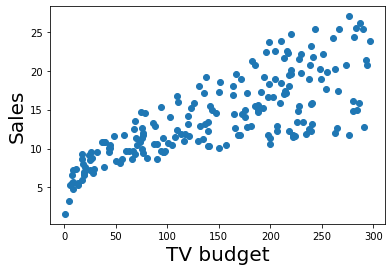

In [8]:
plt.scatter(x1,y)
plt.xlabel('TV budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)

Text(0, 0.5, 'Sales')

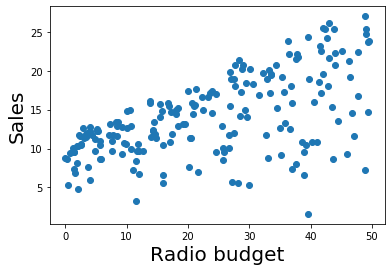

In [9]:
plt.scatter(x2,y)
plt.xlabel('Radio budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)

Text(0, 0.5, 'Sales')

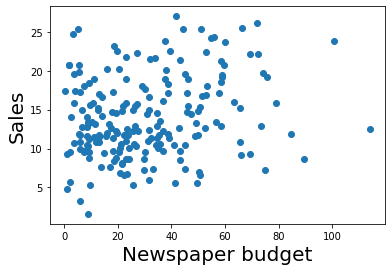

In [10]:
plt.scatter(x3,y)
plt.xlabel('Newspaper budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)

# Simple Linear Regression using Stats-Models.
<img src="incorpo.png" style="width:150px;height:100px"/>
- It is practical for computaional purposes to incorporate Xo = 1


In [12]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        10:59:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Key observations:-
- yhat = 0.0475*(x1) + 7.0326
- Std err show the accuracy of the prediction.
- t-statistic and p-value are something that are related with Hypothesis Testing

H0:B =0 
Is the coefficient is equal to Zero?

Is this a useful variable? 

Does it explains the variability we have in this case?

Once we have rejected the null hypothesis in favor of the alternative hypothesis,-  **it is natural we want to quantify the extent to which the model fits the data.** 

- **A p-value <0.05/0.01 means that the variable is the significant**


# Assessing the Accuracy of the Model

### The quality of a linear regression fit is typically assessed using two related quantities:

- 1. the R2 statistic and
- 2. the residual standard error (RSE) 
###     1. the R2 statistic 
 
- **R-Squared** = It measures the goodness of fit of your regression line.
- it value btw 0 to 1, 0 mean your regression line explains none of the variability and 1 means your regression line explains entire of the variability of the data.
- Usually occuring value for it are 0.2 - 0.9
###     2. the residual standard error (RSE) 
 <img src="r squared exp.png"/>
 <img src="images.png"/>


 <img src="rse.png"/>
 <img src="rss.png"/>

## Finding Residual Standard Error (RSE)

 <img src="rsef.png"/>
- It is the average amount that the response will deviate from the true regression line.
-  for more check it out :- https://medium.com/microsoftazure/how-to-better-evaluate-the-goodness-of-fit-of-regressions-990dbf1c0091

In [21]:
data['yhat'] = 0.0475*data['TV'] + 7.0326

In [22]:
data.head(3)

,TV,radio,newspaper,sales,yhat
0,230.1,37.8,69.2,22.1,17.96235
1,44.5,39.3,45.1,10.4,9.14635
2,17.2,45.9,69.3,9.3,7.84960


In [23]:
RSS = (data['sales']-data['yhat'])**2
RSS = sum(RSS)
RSS

2102.5383439375005

In [24]:
n = 200
RSE = np.sqrt(RSS/(n-2))
RSE.round(2)

3.26

In [25]:
data['sales'].mean()

14.022500000000003

- It means , actual sales in each market deviate from the true regression line by approximately 3,260 units, on average.
- Of course, whether or not 3,260 units is an acceptable prediction error depends on the problem context. In the advertising data set, the mean value of sales(data['sales'].mean() over all markets is approximately 14,000 units, and so the percentage error is 3,260/14,000 = 23%.

In [26]:
d = {"R2":[0.612],'RSE':[3.26]}
assess = pd.DataFrame(d)
assess

,R2,RSE
0,0.612,3.26


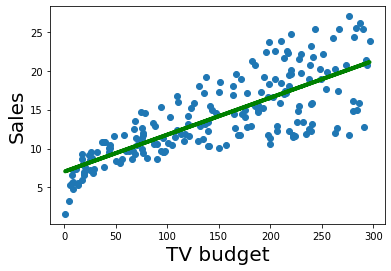

In [27]:
plt.scatter(x1,y)
yhat = 0.0475*x1 + 7.0326
fig = plt.plot(x1,yhat,lw=4, c='green', label='Simple Regression Line')
plt.xlabel('TV budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)
#plt.xlim(0)
#plt.ylim(0)
plt.show()

## Simple Linear Regression of sales on radio

In [28]:
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           4.35e-19
Time:                        14:06:53   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression of sales on Newspaper

In [29]:
x = sm.add_constant(x3)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 03 Feb 2020   Prob (F-statistic):            0.00115
Time:                        14:06:59   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets Plot our Regression Fit Line
- This is the best fitting line, or line that is closest to all our 200 observation
- The graph is a visual representation of a Regression

Text(0, 0.5, 'Sales')

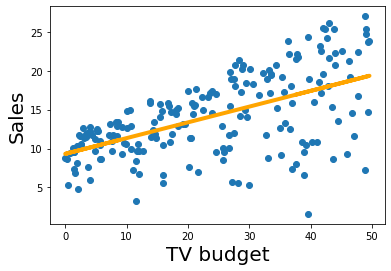

In [30]:
plt.scatter(x2,y)
yhat = 0.2025*x2 + 9.3116
fig = plt.plot(x2,yhat,lw=4, c='orange', label='Simple Regression Line')
plt.xlabel('TV budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)

Text(0, 0.5, 'Sales')

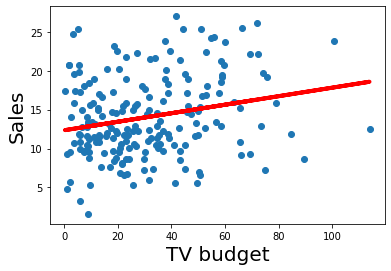

In [31]:
plt.scatter(x3,y)
yhat = 0.0547*x3 + 12.3514
fig = plt.plot(x3,yhat,lw=4, c='red', label='Simple Regression Line')
plt.xlabel('TV budget',fontsize=20)
plt.ylabel('Sales',fontsize=20)